In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('model_features_round2_classic_historical.csv')
print(df.shape)
df.head()

(240, 42)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,ovr_rating_bpi,ovr_rating_kenpom,...,eff_def,ft%_def,height_eff,size,bench,adj_tempo,s_c,c_a,c_b,c_f
0,2008,East,Second Round,1,2008 North Carolina,9,2008 Arkansas,1,10.5,13.2768,...,-11.3529,-0.7,-3.73,-0.08,-0.67,6.5,1,0,0,0
1,2008,East,Second Round,5,2008 Notre Dame,4,2008 Washington St.,0,-2.1,-4.7089,...,-13.7218,-8.7,0.00,-0.51,1.55,11.8,0,0,0,0
2,2008,East,Second Round,6,2008 Oklahoma,3,2008 Louisville,0,-6.6,-8.1229,...,-9.8128,8.3,1.64,1.23,-4.61,-2.2,0,0,0,0
3,2008,East,Second Round,7,2008 Butler,2,2008 Tennessee,0,-3.6,-3.0397,...,-17.8671,2.1,-3.28,-1.18,-6.83,-12.8,0,0,1,0
4,2008,Midwest,Second Round,1,2008 Kansas,8,2008 UNLV,1,13.3,20.3454,...,-16.3229,-6.7,3.48,0.45,2.76,2.9,1,0,0,0


In [258]:
df2 = df.drop(columns=['year', 
                       'region', 
                       'round', 
                       'high_bracket_seed', 
                       'high_bracket_team', 
                       'low_bracket_seed', 
                       'low_bracket_team'
                      ])
print(df2.shape)
df2.head()

(240, 35)


,win,ovr_rating_bpi,ovr_rating_kenpom,ovr_rating_torvik,wab,off_rating_bpi,off_rating_kenpom,off_rating_torvik,def_rating_bpi,def_rating_kenpom,...,eff_def,ft%_def,height_eff,size,bench,adj_tempo,s_c,c_a,c_b,c_f
0,1,10.5,13.2768,0.095338,11.360016,15.1,15.238142,11.836520,-4.5,-1.641373,...,-11.3529,-0.7,-3.73,-0.08,-0.67,6.5,1,0,0,0
1,0,-2.1,-4.7089,-0.024250,-0.531302,-2.6,8.071929,6.505324,0.5,-13.327372,...,-13.7218,-8.7,0.00,-0.51,1.55,11.8,0,0,0,0
2,0,-6.6,-8.1229,-0.076898,-1.939622,-6.5,-3.354741,-6.451341,-0.2,-5.894226,...,-9.8128,8.3,1.64,1.23,-4.61,-2.2,0,0,0,0
3,0,-3.6,-3.0397,-0.045572,-4.464646,0.5,11.370448,5.761377,-4.1,-14.523992,...,-17.8671,2.1,-3.28,-1.18,-6.83,-12.8,0,0,1,0
4,1,13.3,20.3454,0.144085,7.711191,6.4,17.874309,14.422822,7.0,4.144395,...,-16.3229,-6.7,3.48,0.45,2.76,2.9,1,0,0,0


<Axes: title={'center': 'Correlation with the Response Variable'}>

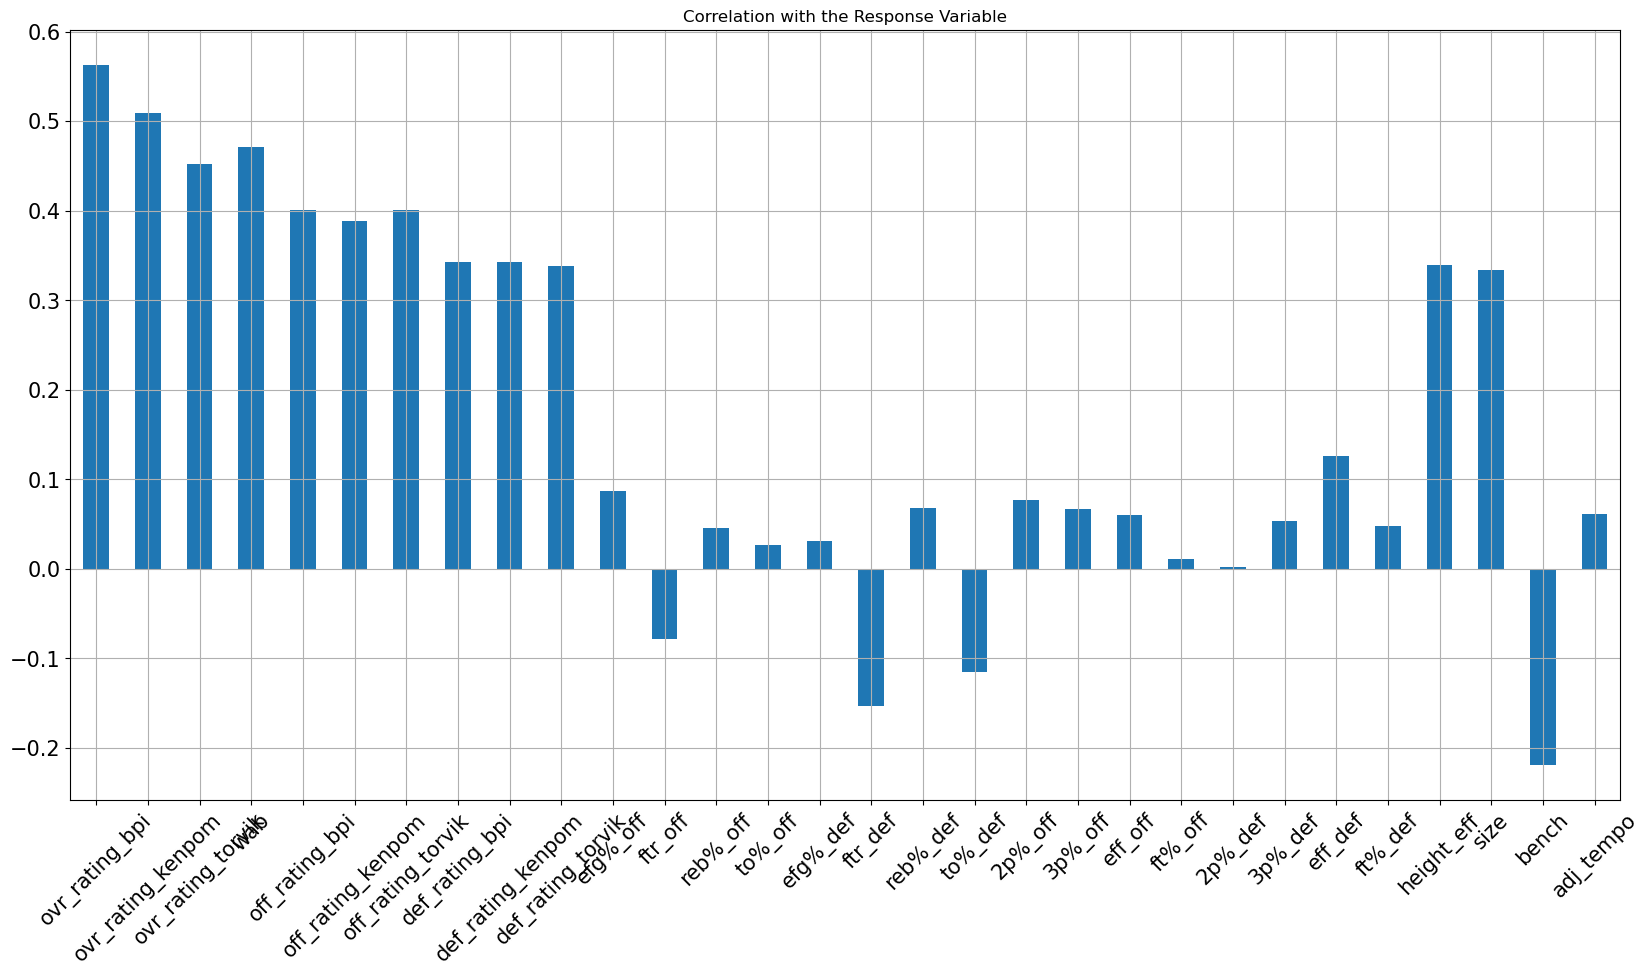

In [259]:
df2.drop(columns=['win', 's_c', 'c_a', 'c_b', 'c_f']).corrwith(df2.win).plot.bar(
    figsize=(20,10), title='Correlation with the Response Variable', fontsize=15,
    rot=45, grid=True
)

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='win'),
                                                    df2['win'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(192, 34)
(192,)
(48, 34)
(48,)


In [261]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

# I. Logistic Regression

In [262]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [263]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8229166666666666
Accuracy Test:  0.7291666666666666
Precision Train:  0.8444444444444444
Precision Test:  0.6666666666666666
Recall Train:  0.7916666666666666
Recall Test:  0.7619047619047619
F1 Train:  0.8172043010752689
F1 Test:  0.7111111111111111
ROC_AUC Train:  0.8229166666666665
ROC_AUC Test:  0.7328042328042328


# II. RFE Logistic Regression

In [265]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(clf, n_features_to_select=17, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=17)

In [266]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [267]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.7916666666666666
Accuracy Test:  0.75
Precision Train:  0.7916666666666666
Precision Test:  0.7142857142857143
Recall Train:  0.7916666666666666
Recall Test:  0.7142857142857143
F1 Train:  0.7916666666666666
F1 Test:  0.7142857142857143
ROC_AUC Train:  0.7916666666666666
ROC_AUC Test:  0.746031746031746


In [268]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
           pd.DataFrame(np.transpose(clf.coef_), columns=['coef'])],
           axis=1)

,features,coef
0,ovr_rating_bpi,1.348379
1,ovr_rating_kenpom,-0.791028
2,ovr_rating_torvik,0.410317
3,wab,-0.693622
4,off_rating_bpi,0.868260
5,off_rating_kenpom,-0.570750
6,off_rating_torvik,0.578072
7,def_rating_bpi,0.955434
8,def_rating_kenpom,-0.453456
9,efg%_def,-0.094310


### Underfit!

# III. Lasso Regression

In [269]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [270]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
selected features: 17
features with coefficients shrank to zero: 17


In [271]:
selected_feat

Index(['ovr_rating_bpi', 'wab', 'def_rating_kenpom', 'def_rating_torvik',
       'reb%_off', 'to%_off', 'efg%_def', 'to%_def', 'eff_off', '2p%_def',
       'ft%_def', 'height_eff', 'size', 'bench', 'adj_tempo', 's_c', 'c_a'],
      dtype='object')

In [272]:
X_train2 = X_train[['ovr_rating_bpi', 'wab', 'def_rating_kenpom', 'def_rating_torvik',
                    'reb%_off', 'to%_off', 'efg%_def', 'to%_def', 'eff_off', '2p%_def',
                    'ft%_def', 'height_eff', 'size', 'bench', 'adj_tempo', 's_c', 'c_a']]
X_test2 = X_test[['ovr_rating_bpi', 'wab', 'def_rating_kenpom', 'def_rating_torvik',
                  'reb%_off', 'to%_off', 'efg%_def', 'to%_def', 'eff_off', '2p%_def',
                  'ft%_def', 'height_eff', 'size', 'bench', 'adj_tempo', 's_c', 'c_a']]


clf = LogisticRegression(random_state=0)
clf.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [273]:
y_pred_train = clf.predict(X_train2)
y_pred_test = clf.predict(X_test2)

In [274]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  0.8072916666666666
Accuracy Test:  0.75
Precision Train:  0.8172043010752689
Precision Test:  0.7142857142857143
Recall Train:  0.7916666666666666
Recall Test:  0.7142857142857143
F1 Train:  0.8042328042328043
F1 Test:  0.7142857142857143
ROC_AUC Train:  0.8072916666666665
ROC_AUC Test:  0.746031746031746


### RFE is better

# IV. SVM

In [275]:
from sklearn.svm import SVC

clf = SVC(random_state=0, kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [276]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [277]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test))  

Accuracy Train:  0.8333333333333334
Accuracy Test:  0.7291666666666666
Precision Train:  0.8555555555555555
Precision Test:  0.6818181818181818
Recall Train:  0.8020833333333334
Recall Test:  0.7142857142857143
F1 Train:  0.8279569892473118
F1 Test:  0.6976744186046512
ROC_AUC Train:  0.8333333333333334
ROC_AUC Test:  0.7275132275132274


# V. Random Forest

In [278]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [279]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [280]:
print('Accuracy Train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy Test: ', accuracy_score(y_test, y_pred_test))

print('Precision Train: ', precision_score(y_train, y_pred_train))
print('Precision Test: ', precision_score(y_test, y_pred_test))
      
print('Recall Train: ', recall_score(y_train, y_pred_train))
print('Recall Test: ', recall_score(y_test, y_pred_test))    

print('F1 Train: ', f1_score(y_train, y_pred_train))
print('F1 Test: ', f1_score(y_test, y_pred_test)) 

print('ROC_AUC Train: ', roc_auc_score(y_train, y_pred_train))
print('ROC_AUC Test: ', roc_auc_score(y_test, y_pred_test)) 

Accuracy Train:  1.0
Accuracy Test:  0.8541666666666666
Precision Train:  1.0
Precision Test:  0.85
Recall Train:  1.0
Recall Test:  0.8095238095238095
F1 Train:  1.0
F1 Test:  0.8292682926829269
ROC_AUC Train:  1.0
ROC_AUC Test:  0.8492063492063492


# VI. Full DF

In [281]:
comp_df = df[['year', 
              'region', 
              'round', 
              'high_bracket_seed', 
              'high_bracket_team',
              'low_bracket_seed', 
              'low_bracket_team', 
              'win']]
              
df = df.drop(columns=['year', 
                      'region', 
                      'round', 
                      'high_bracket_seed', 
                      'high_bracket_team',
                      'low_bracket_seed', 
                      'low_bracket_team', 
                      'win'
                     ])
log_pred = rfe.predict(df)
comp_df['log_pred'] = log_pred
comp_df['log_comp'] = comp_df['win'] - comp_df['log_pred']
rf_pred = clf.predict(df)
comp_df['rf_pred'] = rf_pred
comp_df['rf_comp'] = comp_df['win'] - comp_df['rf_pred']

### Random Forest is at 81%. Logistic Regression is at 71%. Goal is 87.5% (Average 14 per year)

## Next Steps: Boosting, PCA, Test different features for Logistic Regression